## Proyecto: Aprendizaje automático

Con este caso, esperamos que pueda completar aprendizaje sobre clasificación. Puede probar los algoritmos en un conjunto de datos y comparar el rendimiento de los diferentes clasificadores con diferentes métricas de rendimiento.

Hay varios desafios, como elegir el mejor algoritmo además de seleccionar buenos hiperparámetros de los algoritmos, por ejemplo, funciones de activación en Redes Neuronales, numero de vecinos en KNN, etc. El rendimiento de los algoritmos depende de esto. Esta fase puede consumir rápidamente grandes cantidades de capacidad computacional.

### Entorno: 
Ademas de Google Colab, puede usar Python instalando la distribución de Anaconda Python para instalar la mayoría de los paquetes que necesita. En Windows, Anaconda proporciona un instalador simple de doble clic para su conveniencia.

Este cuaderno utiliza varios paquetes de Python que vienen de serie con la distribución Anaconda Python. Las bibliotecas principales que usaremos son:

**NumPy**: proporciona una estructura de matriz numérica rápida y funciones auxiliares.

**pandas**: proporciona una estructura DataFrame para almacenar datos en la memoria y trabajar con ellos de manera fácil y eficiente.

**scikit-learn**: el paquete esencial de Machine Learning en Python.

**matplotlib**: biblioteca básica de trazado en Python; la mayoría de las otras bibliotecas de trazado de Python están construidas sobre él.

**Seaborn**: biblioteca de gráficos estadísticos avanzados.

Para asegurarse de tener todos los paquetes que necesita, puede usar conda:

conda install numpy pandas scikit-learn matplotlib seaborn

conda install -c conda-forge watermark

O comando 'pip'

conda puede pedirle que actualice algunos de ellos si no tiene la versión más reciente. Lo usual es que permita que lo haga.

### Paso 1: Descripción de problemática

Primeramente estos pasos típicamente se basan en la metodología KDD. Ver paper:

Knowledge Discovery and Data Mining: Towards a Unifying Framework
https://www.aaai.org/Papers/KDD/1996/KDD96-014.pdf

El primer paso para cualquier proyecto de análisis de datos está dado por la descripción de problemática. Para ello es útil definir las preguntas que buscamos resolver y definir una medida (o conjunto de medidas) para nuestro éxito en la resolución de esa tarea. La lista de preguntas típicas son las siguientes:

1. ¿Especificó el tipo de pregunta analítica de datos (p. ej., exploración, causalidad de asociación: *reglas de asociación*, clasificación, agrupamiento) antes de tocar los datos?

Estamos tratando de clasificar parte de terreno usando las variables que nos proporcionan. 

*Los detalles de este dataset se pueden observar en:

https://archive.ics.uci.edu/ml/datasets/Covertype



```
Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name / Data Type / Measurement / Description

Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation


```



2. ¿Definió la métrica para cuantificar éxito?

Dado que estamos realizando una clasificación, podemos usar el acierto, la fracción de terrenos clasificados correctamente, para cuantificar el rendimiento de nuestro modelo. 

A veces la organizacion tiene una umbral deseados, por ejemplo el 90 % de acierto.

**Clasificación**: acierto (*accuracy*), *precision*, *recall* y F-score. En ejercicio usaremos la última métrica. 

**Regresión**: error cuadratico medio, error absoluto medio, y coeficiente de determinacion (R2). 

3. ¿Entendió el contexto de la pregunta y la aplicación científica o comercial?

(Ejm) Estamos construyendo parte de un clasificador de terrenos. Puede ser integrado en una aplicacion móvil.

4. ¿Describió el diseño experimental?

(Ejm) Se tomaron datos de terrenos usando imáganes de satélites XXXX. Estos datos fueron obtenidos día a día durante XXXX. Etc. 


Pensar y documentar el problema en el que estamos trabajando es un paso importante para realizar un análisis de datos efectivo que a menudo se pasa por alto. 

### Paso 1.1. El dominio del problema

Adicionalmente es relevante y/o deseable que conozca al máximo en lo posible el dominio del problema. ¿En que consiste problemática? ¿cómo se resuelve hoy? ¿qué personas son clave para obtener la data? ¿Que soluciones existen?, etc.

## Paso 2: Creación/obtención de base de datos

El siguiente paso es mirar los datos con los que estamos trabajando. Incluso los conjuntos de datos seleccionados de una organización pueden tener errores, y es vital que detectemos estos errores antes de invertir demasiado tiempo en nuestro análisis.

En general, buscamos responder las siguientes preguntas:

¿Hay algo mal con los datos?
¿Hay alguna peculiaridad con los datos?
¿Necesito corregir o eliminar alguno de los datos?
Comencemos leyendo los datos en un DataFrame de pandas.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_covtype
from sklearn.metrics import precision_recall_fscore_support,matthews_corrcoef
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

forests = fetch_covtype()
X = forests.data
Y = forests.target

print(forests.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

### Paso 3: Análisis exploratorio de datos y preprocesamiento

En este paso aplicaremos diversas técnicas para entender los datos. :

Número de clases: 
7


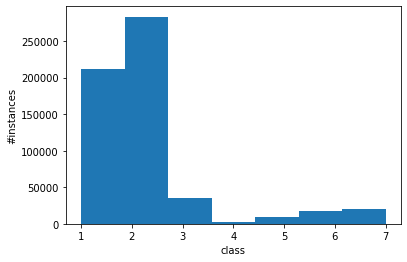

Valores numericos de histograma: 
(array([211840, 283301,  35754,   2747,   9493,  17367,  20510]), array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
       5.28571429, 6.14285714, 7.        ]))


In [29]:
print("Número de clases: ")
print(len(np.unique(Y)))
plt.figure()
plt.hist(Y,7)
plt.ylabel('#instances')
plt.xlabel('class')
plt.show()
print("Valores numericos de histograma: ")
print(np.histogram(Y,7))

In [33]:
#forma no ortodoxa de hacer sampling
#A veces se requiere hacer sampling, cuando necesitas pruebas rapidas.
#En este ejemplo usaremos el 10% de datos como muestra.
# comentario offtopic: en series de tiempo se usan el rolling crossvalidation.
from sklearn.model_selection import train_test_split

X_sample,X_nosample,y_sample,y_nosample = train_test_split(X,Y,test_size=0.9)

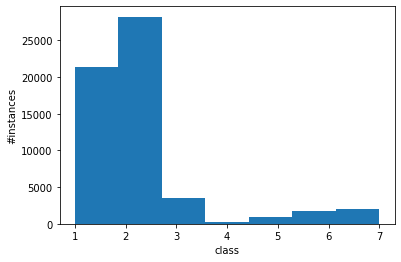

(array([21330, 28208,  3565,   290,   933,  1729,  2046]), array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
       5.28571429, 6.14285714, 7.        ]))


In [39]:
plt.figure()
plt.hist(y_sample,7)
plt.ylabel('#instances')
plt.xlabel('class')
plt.show()
print(np.histogram(y_sample,7))

In [34]:
type(X_sample)
df_X = pd.DataFrame(X_sample)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2748.0,44.0,26.0,162.0,75.0,1230.0,216.0,174.0,79.0,553.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2998.0,244.0,11.0,175.0,19.0,5735.0,197.0,249.0,189.0,1973.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3024.0,350.0,12.0,120.0,23.0,2825.0,198.0,220.0,160.0,6148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2792.0,128.0,20.0,342.0,91.0,1830.0,248.0,224.0,95.0,2168.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3008.0,12.0,14.0,277.0,4.0,4188.0,205.0,210.0,140.0,3598.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_Y = pd.DataFrame(y_sample)
df_Y.tail()

,0
58096,2
58097,1
58098,2
58099,2
58100,2


In [ ]:
# df_X_sample = df.sample(frac=0.05,random_state = 1)
# sample = df.sample(n = 5, random_state = 1)
# print(sample)

Una de las primeras tareas típicas es rellenar información faltantes, para ello podemos seguir instrucciones en código de clase de "Preprocesamiento".

In [36]:
df_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,...,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000
mean,2961.074698,156.411611,14.086418,269.164352,46.358841,2343.614895,212.160909,223.406189,142.618509,1982.308893,...,0.044991,0.088845,0.076832,0.002582,0.003632,0.000224,0.000602,0.026316,0.024526,0.015215
std,280.468174,111.965620,7.473772,211.990554,57.792461,1553.637810,26.781048,19.686795,38.363497,1324.234180,...,0.207285,0.284523,0.266327,0.050745,0.060154,0.014957,0.024537,0.160075,0.154678,0.122408
min,1860.000000,0.000000,0.000000,0.000000,-157.000000,0.000000,0.000000,80.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,59.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2998.000000,128.000000,13.000000,218.000000,30.000000,1986.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3165.000000,262.000000,18.000000,384.000000,69.000000,3317.000000,231.000000,237.000000,168.000000,2556.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3846.000000,360.000000,60.000000,1343.000000,567.000000,7048.000000,254.000000,254.000000,254.000000,7122.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Tipica linea para uso de graficos en notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# Como seaborn no sabe que hacer con NA, entonces puede ir code. En este caso no es necesario.
sb.pairplot(df_X)

### Paso 4: Clasificación

En este paso se deben aplicar los algoritmos de clasificación de datos.

In [42]:
#Tipicamente va 2/3 o 70% para entrenamiento. Cuando tienen mucha data, pueden disminuir ese porcentaje.
#Ejemplo esta dado en datos tabulares. En datos secuenciales se debe dividir, considerando los primeros registros como train set y los ultimos como test.
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

In [43]:
#1. Otra métrica alternativa es balanced accuracy.
#2. En este ejercicio ha faltado la normalización de datos (ejm: min-max, z-score)
classifiers = [KNeighborsClassifier(3), #KNN
               KNeighborsClassifier(5),
               KNeighborsClassifier(10),
               DecisionTreeClassifier(max_depth=5), #Árbol de decisión.
               DecisionTreeClassifier(max_depth=10),
               DecisionTreeClassifier(max_depth=20),
               LogisticRegression(max_iter=10000), #Regresion logística
               GaussianNB(), #Naive Bayes
               MLPClassifier(hidden_layer_sizes=(100, 50), #Red neuronal disponible en sklearn de Python, para versiones mas sofisticadas usar Keras.
                             max_iter=10000, activation='relu'),
               MLPClassifier(hidden_layer_sizes=(50, 10),
                             max_iter=10000, activation='tanh')]

clf_names = ["Nearest Neighbors (k=3)",
             "Nearest Neighbors (k=5)",
             "Nearest Neighbors (k=10)",
             "Decision Tree (Max Depth=5)",
             "Decision Tree (Max Depth=10)",
             "Decision Tree (Max Depth=20)",
             "Logistic Regression",
             "Gaussian Naive Bayes",
             "MLP (RelU)",
             "MLP (tanh)"]

scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Nearest Neighbors (k=3)
predicting labels for classifier Nearest Neighbors (k=3)
fitting classifier Nearest Neighbors (k=5)
predicting labels for classifier Nearest Neighbors (k=5)
fitting classifier Nearest Neighbors (k=10)
predicting labels for classifier Nearest Neighbors (k=10)
fitting classifier Decision Tree (Max Depth=5)
predicting labels for classifier Decision Tree (Max Depth=5)
fitting classifier Decision Tree (Max Depth=10)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


predicting labels for classifier Decision Tree (Max Depth=10)
fitting classifier Decision Tree (Max Depth=20)
predicting labels for classifier Decision Tree (Max Depth=20)
fitting classifier Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


predicting labels for classifier Logistic Regression
fitting classifier Gaussian Naive Bayes
predicting labels for classifier Gaussian Naive Bayes
fitting classifier MLP (RelU)
predicting labels for classifier MLP (RelU)
fitting classifier MLP (tanh)
predicting labels for classifier MLP (tanh)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
scores_df

,Nearest Neighbors (k=3),Nearest Neighbors (k=5),Nearest Neighbors (k=10),Decision Tree (Max Depth=5),Decision Tree (Max Depth=10),Decision Tree (Max Depth=20),Logistic Regression,Gaussian Naive Bayes,MLP (RelU),MLP (tanh)
precision (macro),0.815455,0.799410,0.805013,0.564061,0.714708,0.727545,0.534846,0.380089,0.749487,0.420667
recall (macro),0.753484,0.700032,0.635865,0.446815,0.610314,0.702809,0.408035,0.585524,0.690673,0.321706
fscore (macro),0.781397,0.741078,0.692765,0.461541,0.643178,0.713161,0.437583,0.367998,0.707671,0.297739
precision (micro),0.870002,0.852562,0.826229,0.703574,0.757157,0.811026,0.704779,0.460100,0.782112,0.683323
recall (micro),0.870002,0.852562,0.826229,0.703574,0.757157,0.811026,0.704779,0.460100,0.782112,0.683323
fscore (micro),0.870002,0.852562,0.826229,0.703574,0.757157,0.811026,0.704779,0.460100,0.782112,0.683323
MCC,0.789853,0.760838,0.716966,0.511018,0.603818,0.695393,0.510721,0.306886,0.660242,0.473114


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


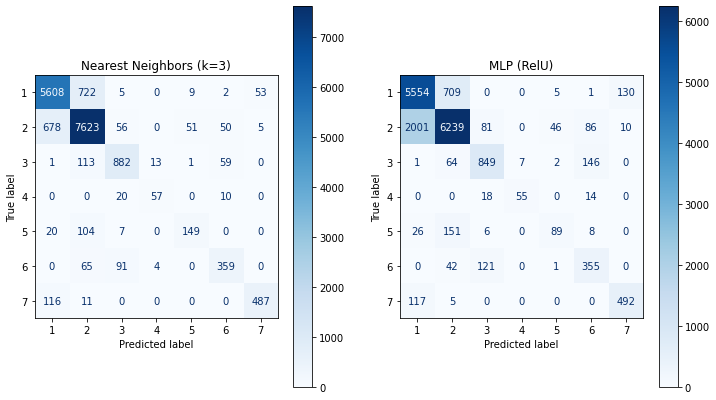

In [45]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(1,2, figsize=(12,7))
plot_confusion_matrix(classifiers[0], X_test, Y_test, cmap=plt.cm.Blues, ax=axes[0])
plot_confusion_matrix(classifiers[8], X_test, Y_test, cmap=plt.cm.Blues, ax=axes[1])
axes[0].set_title(clf_names[0])
axes[1].set_title(clf_names[8])
plt.show()

## Tuneo de hiperparámetros

Cada modelo de Machine Learning viene con una variedad de parámetros para ajustar, y estos parámetros pueden ser de vital importancia para el rendimiento de nuestro clasificador. Por ejemplo, si limitamos severamente el número de vecinos de nuestor KNN. Para ello hay diferentes herramientas desde Python:

Text(0.5, 1.0, 'Average score: 0.8722743055709822')

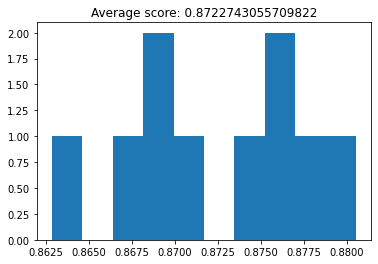

In [46]:
from sklearn.model_selection import cross_val_score
KNN_classifier = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(KNN_classifier, X_sample, y_sample, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

KNN_classifier  = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [1, 2, 3, 4, 5,6,7,8,9,10]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(KNN_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_sample, y_sample)
print('Mejor score: {}'.format(grid_search.best_score_))
print('Mejores parámetros: {}'.format(grid_search.best_params_))

Mejor score: 0.9061979816900168
Mejores parámetros: {'n_neighbors': 1}


Text(33.0, 0.5, 'n_neighbors')

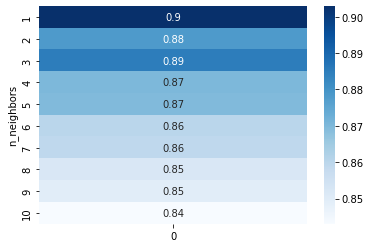

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (10, 1)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
#plt.xticks(np.arange(1) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(10) + 0.5, grid_search.param_grid['n_neighbors'])
#plt.xlabel('max_features')
plt.ylabel('n_neighbors')